In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# # Combine the data into a single dataset
merge_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

# # Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
Mouse ID              1906 non-null object
Timepoint             1906 non-null int64
Tumor Volume (mm3)    1906 non-null float64
Metastatic Sites      1906 non-null int64
Drug                  1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_timepoint_group = merge_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_volume_group = tumor_timepoint_group.mean()

mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume_group)

mean_tumor_volume_df = mean_tumor_volume_df.reset_index()

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_timepoint_group = tumor_timepoint_group.sem()

# Convert to DataFrame
sem_tumor_volume_df = pd.DataFrame(sem_tumor_timepoint_group)

sem_tumor_volume_df = sem_tumor_volume_df.reset_index()

# Preview DataFrame
sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_pivot = mean_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_volume_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
# Minor Data Munging to Re-Format the Data Frames
sem_tumor_volume_df_pivot = sem_tumor_volume_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
sem_tumor_volume_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


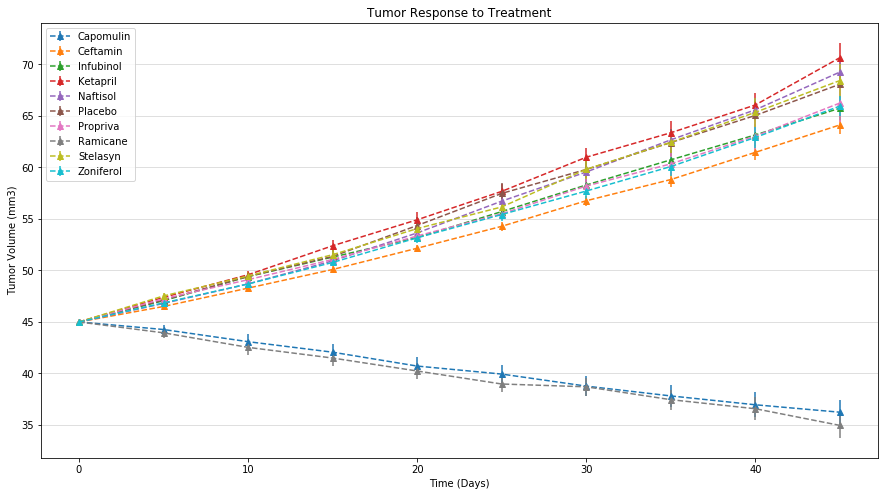

In [18]:
# Generate the Plot (with Error Bars)
x_axis = mean_tumor_volume_df_pivot.index
column_list = mean_tumor_volume_df_pivot.columns

fig, ax = plt.subplots(figsize=(15,8))

for column in column_list:
    ax.errorbar(x_axis,mean_tumor_volume_df_pivot.loc[:,column], yerr=sem_tumor_volume_df_pivot.loc[:,column], 
                linestyle="--", marker="^", label=column)

plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.grid(which='major', axis='y', alpha=0.5)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Images/tumor_response_to_treatment.png")

# Show the Figure
plt.show()

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_timepoint_group = merge_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]

# Convert to DataFrame
mean_metastatic_group = metastatic_timepoint_group.mean()

mean_metastatic_df = pd.DataFrame(mean_metastatic_group)

mean_metastatic_df = mean_metastatic_df.reset_index()

# Preview DataFrame
mean_metastatic_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic_timepoint_group = metastatic_timepoint_group.sem()

# Convert to DataFrame
sem_metastatic_df = pd.DataFrame(sem_metastatic_timepoint_group)

sem_metastatic_df = sem_metastatic_df.reset_index()

# Preview DataFrame
sem_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df_pivot = mean_metastatic_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_metastatic_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Minor Data Munging to Re-Format the Data Frames
sem_metastatic_df_pivot = sem_metastatic_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
sem_metastatic_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


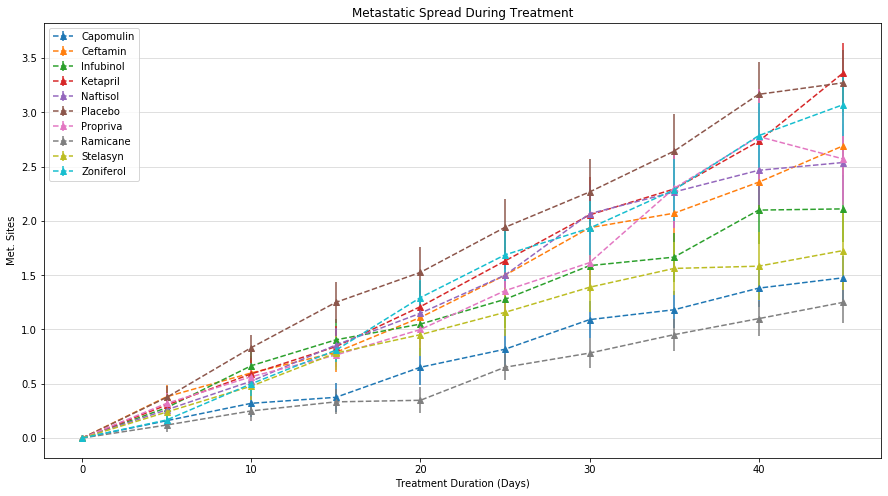

In [19]:
# Generate the Plot (with Error Bars)
x_axis = mean_metastatic_df_pivot.index
column_list = mean_metastatic_df_pivot.columns

fig, ax = plt.subplots(figsize=(15,8))

for column in column_list:
    ax.errorbar(x_axis,mean_metastatic_df_pivot.loc[:,column], yerr=sem_metastatic_df_pivot.loc[:,column], 
                linestyle="--", marker="^", label=column)

plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.grid(which='major', axis='y', alpha=0.5)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# Save the Figure
plt.savefig("Images/metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_group = merge_data.groupby(["Drug","Timepoint"])["Metastatic Sites"]

# Convert to DataFrame
mouse_count_group = mouse_group.count()

mouse_count_df = pd.DataFrame(mouse_count_group)

mouse_count_df = mouse_count_df.reset_index()

mouse_count_df = mouse_count_df.rename(columns = {"Metastatic Sites":"Mouse Count"})

mouse_count_df["Survival Rate"] = ""

starting_mouse_count = 0

for x in range(len(mouse_count_df["Mouse Count"])):
        if mouse_count_df["Timepoint"].iloc[x] == 0:
            starting_mouse_count = mouse_count_df["Mouse Count"].iloc[x]
        mouse_count_df["Survival Rate"].iloc[x] = (mouse_count_df["Mouse Count"].iloc[x] / starting_mouse_count)*100

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100
1,Capomulin,5,25,100
2,Capomulin,10,25,100
3,Capomulin,15,24,96
4,Capomulin,20,23,92


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df_pivot = mouse_count_df.pivot(index="Timepoint", columns="Drug", values="Survival Rate")

# Preview that Reformatting worked
mouse_count_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96.1538,100,96.1538,96
10,100,80,84,88,84,96,88.4615,96,88.4615,88
15,96,76,84,76,84,80,65.3846,96,88.4615,84
20,92,72,80,76,80,76,65.3846,92,80.7692,68


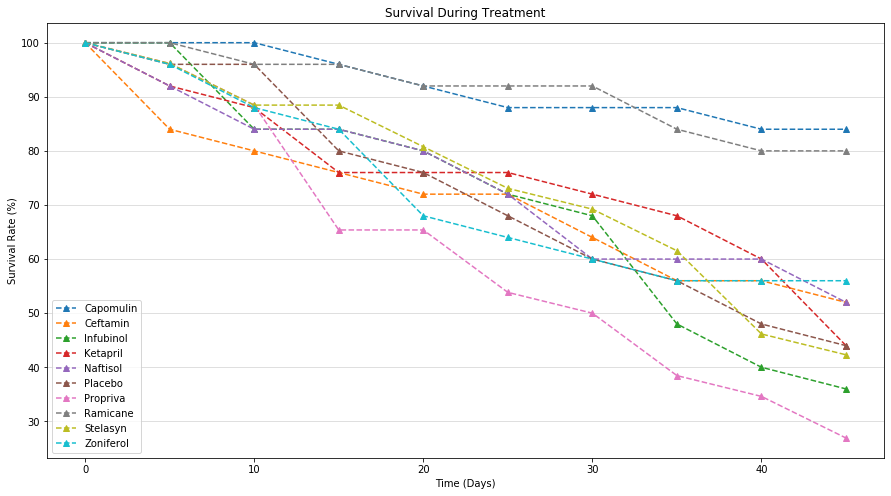

In [20]:
# Generate the Plot (Accounting for percentages)
x_axis = mouse_count_df_pivot.index
column_list = mouse_count_df_pivot.columns

fig, ax = plt.subplots(figsize=(15,8))

for column in column_list:
    ax.errorbar(x_axis,mouse_count_df_pivot.loc[:,column], 
                linestyle="--", marker="^", label=column)

plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.grid(which='major', axis='y', alpha=0.5)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Images/survival_during_treatment.png")

# Show the Figure
plt.show()

In [54]:
# Calculate the percent changes for each drug
chg_tumor_volume_df_pivot = mean_tumor_volume_df.pivot(index="Drug", columns="Timepoint", values="Tumor Volume (mm3)")

chg_tumor_volume_df_pivot["Percent Change"] = ((chg_tumor_volume_df_pivot[45] / chg_tumor_volume_df_pivot[0]) - 1) * 100

chg_tumor_volume_df = pd.DataFrame(chg_tumor_volume_df_pivot["Percent Change"])

chg_tumor_volume_df = chg_tumor_volume_df.sort_values(by=['Percent Change'])

# Display the data to confirm
chg_tumor_volume_df

,Percent Change
Drug,
Ramicane,-22.320900
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Zoniferol,46.579751
Propriva,47.241175
Placebo,51.297960
Stelasyn,52.085134
Naftisol,53.923347


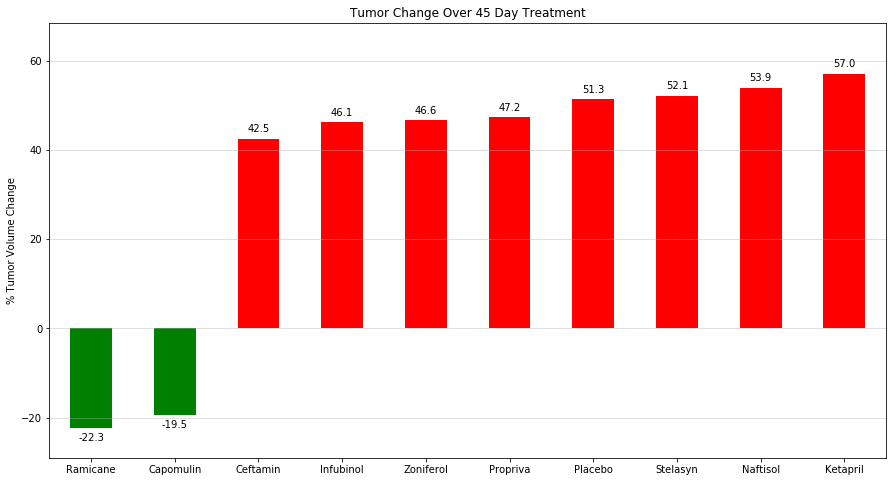

In [72]:
x_axis = np.arange(len(chg_tumor_volume_df['Percent Change']))

ax = chg_tumor_volume_df.plot(kind="bar", color=[np.where(chg_tumor_volume_df['Percent Change']<0, 'g', 'r')], figsize=(15,8))

plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(which='major', axis='y', alpha=0.5)
ax.set_xlabel("")
ax.set_ylabel("% Tumor Volume Change")
ax.get_legend().remove()
plt.xticks(rotation=0)
plt.ylim(min(chg_tumor_volume_df['Percent Change'])*1.3, max(chg_tumor_volume_df['Percent Change'])*1.2)

def add_value_labels(ax, spacing=5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

# Call the function above. All the magic happens there.
add_value_labels(ax)


# Save the Figure
plt.savefig("Images/tumor_change_over_45_day_treatment.png")

# Show the Figure
fig.show()

Based on the results of the study, three observations are:
    1. Ramicane and Capomulin appear to show the most promise in terms of (i) tumor response to treatment (decrease in volume) and (ii) higher survival rates during the treatment period relative to the other drugs and Placebo group
    2. Ramicane and Capomulin did not prevent metatstatic spread during treatment, but the rates of spread for these drugs were less than the other drugs and Placebo group
    3. Stelasyn, Naftisol and Ketapril could potentially do more harm than good, as shown by greater increase in tumor size over the 45 treatment relative to the Placebo group; however, these drugs showed potential in rate of metastatic spread over the first 40 days of treatment relative to the Placebo group